In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
import pandas as pd
import tensorflow as tf
dataset_home = ''

In [39]:
if tf.test.gpu_device_name():
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

Please install GPU version of TF


In [80]:
path_train = r"C:\Users\pasuk\senior-project\normal-vs-abnormal\train"
path_test = r"C:\Users\pasuk\senior-project\normal-vs-abnormal\test"
path = r"C:\Users\pasuk\senior-project"

In [70]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        os.path.join(dataset_home, path_train),
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        os.path.join(dataset_home, path_test),
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')
test_generator = train_datagen.flow_from_directory(
        os.path.join(dataset_home, path_test),
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 9812 images belonging to 2 classes.
Found 9613 images belonging to 2 classes.
Found 9613 images belonging to 2 classes.


In [51]:
class MyModel(tf.keras.Model):

  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1   = tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3))
    self.mp1     = tf.keras.layers.MaxPool2D(2,2)

    self.conv2   = tf.keras.layers.Conv2D(32, (3,3), activation='relu')
    self.mp2     = tf.keras.layers.MaxPooling2D(2,2)

    self.conv3   = tf.keras.layers.Conv2D(64, (3,3), activation='relu')
    self.mp3     = tf.keras.layers.MaxPooling2D(2,2)

    self.flatten = tf.keras.layers.Flatten()
    self.fc      = tf.keras.layers.Dense(512, activation='relu')
    self.out  = tf.keras.layers.Dense(1, activation='sigmoid')

  def call(self, inputs):
    x = self.conv1(inputs)
    x = self.mp1(x)

    x = self.conv2(x)
    x = self.mp2(x)

    x = self.conv3(inputs)
    x = self.mp3(x)

    x = self.flatten(x)
    x = self.fc(x)
    output = self.out(x)
    return output

In [52]:
from tensorflow.keras.optimizers import RMSprop

In [53]:
import warnings
warnings.filterwarnings("ignore")

model = MyModel()
model.compile(
              optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy', metrics=['accuracy'])

In [107]:
# save model
# model.save('senior-project') floder->assesrt, variables->.index .data.... and .pb
model.save_weights('senior-project\model_weights', save_format='tf') # .checkpoint .index .data.......
# model.save_weights('senior-project\model_weights.h5') .h5

INFO:tensorflow:Assets written to: senior-project\model_weights\assets


# load model
from tensorflow import keras
loaded_model.load_weights('model_weights')

In [55]:
callbacks = [
             tf.keras.callbacks.ModelCheckpoint(
                    'normalVSabnormal.',
                    monitor='val_accuracy',
                    verbose=0,
                    save_best_only=True)
            ]

history = model.fit(
                     train_generator,
                     epochs = 10,
                     callbacks = callbacks,
                     validation_data = validation_generator,
                     verbose = 1
                   )

Epoch 1/10
307/307 [==============================] - 1087s 4s/step - loss: 0.4602 - accuracy: 0.8215 - val_loss: 0.2953 - val_accuracy: 0.8766
Epoch 2/10
307/307 [==============================] - 1072s 3s/step - loss: 0.3535 - accuracy: 0.8441 - val_loss: 0.2663 - val_accuracy: 0.8658
Epoch 3/10
307/307 [==============================] - 1065s 3s/step - loss: 0.3340 - accuracy: 0.8560 - val_loss: 0.1798 - val_accuracy: 0.9146
Epoch 4/10
307/307 [==============================] - 1045s 3s/step - loss: 0.3129 - accuracy: 0.8619 - val_loss: 0.3824 - val_accuracy: 0.8571
Epoch 5/10
307/307 [==============================] - 1044s 3s/step - loss: 0.2936 - accuracy: 0.8729 - val_loss: 0.2564 - val_accuracy: 0.8733
Epoch 6/10
307/307 [==============================] - 1101s 4s/step - loss: 0.2754 - accuracy: 0.8733 - val_loss: 0.2402 - val_accuracy: 0.8880
Epoch 7/10
307/307 [==============================] - 1196s 4s/step - loss: 0.2770 - accuracy: 0.8789 - val_loss: 0.2002 - val_accuracy:

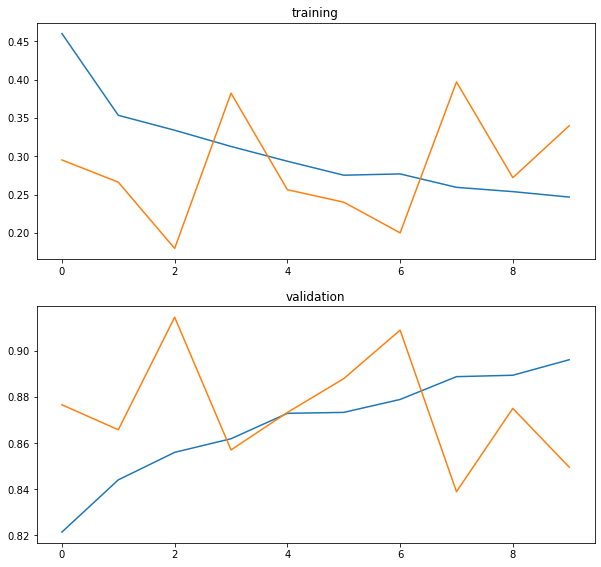

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,20))

plt.subplot(4,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('training');

plt.subplot(4,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('validation');

In [ ]:
# Testing
TEST_FILE = 30
path_testing = r"C:\Users\pasuk\senior-project\normal-vs-abnormal\testing"
probabilities = model.predict_generator(test_generator, TEST_FILE)
for index, probability in enumerate(probabilities):
    image_path = path_test + "/" +test_generator.filenames[index]
    img = mpimg.imread(image_path)
    plt.imshow(img)
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% abnormal")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% normal")
    plt.show()

In [72]:
import matplotlib.image as mpimg
